# Ejercicio 2 - Análisis de condiciones de vivienda en México usando datos del INEGI
# Fase 1: CARGA Y EXPLORACIÓN GENERAL por Eduardo | Rama: Eduardo

**1.- Importación de librerias**

In [328]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

**1.2- Cargamos el dataset con polars.**

In [329]:
df = pl.read_csv(
    "viviendas.csv",  # <-- ruta relativa
    null_values="&",
    infer_schema_length=10000,
    ignore_errors=True
)

df.head()


folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
i64,i64,i64,i64,i64,str,str,i64,str,i64,i64,i64,str,i64,str,str,str,str,str,str,i64,i64,str,str,i64,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
100005002,1,8,10,3,"""30""",""" """,1,"""2""",2,4,1,"""1""",1,"""2""","""1""","""2""","""1""","""0""","""0""",1,1,"""0""","""8""",3,""" """,3,4,""" ""","""4000""",""" """,""" ""","""1""","""2""","""1""","""01""","""1""",""" """,""" ""","""1""",2,1,1,1,1,2,1,1,1,1,2,2,2,3,0,3,1,1001,1,4,3,1,206,0
100005003,1,8,10,3,"""15""",""" """,1,"""2""",3,5,1,"""1""",1,"""2""","""1""","""2""","""3""","""1""","""0""",1,1,"""0""","""9""",4,""" """,3,1,"""8500""",""" """,""" ""","""1""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1,1,1,1,1,2,1,1,1,1,1,2,2,2,1,1,1,1001,1,4,3,1,206,0
100005004,1,8,10,3,"""25""",""" """,1,"""2""",3,7,1,"""1""",1,"""2""","""1""","""2""","""2""","""1""","""0""",1,1,"""0""","""10""",3,""" """,3,4,""" ""","""10000""",""" """,""" ""","""1""","""2""","""5""","""01""","""1""",""" """,""" ""","""1""",1,1,1,1,1,1,1,1,1,1,2,2,2,3,2,1,1,1001,1,4,3,1,206,0
100012002,1,8,10,3,"""50""",""" """,1,"""2""",4,6,1,"""1""",1,"""2""","""1""","""2""","""2""","""0""","""0""",1,1,"""9""","""8""",4,""" """,3,4,""" ""","""5000""",""" """,""" ""","""1""","""2""","""1""","""01""","""1""",""" """,""" ""","""1""",1,1,1,1,1,2,1,1,1,1,2,2,2,5,3,2,2,1001,1,3,2,2,167,0
100012004,1,8,10,3,"""45""",""" """,1,"""2""",3,4,1,"""1""",1,"""2""","""1""","""2""","""2""","""1""","""0""",1,1,"""0""","""17""",3,""" """,3,4,""" ""","""3000""",""" """,""" ""","""1""","""2""","""2""","""02""","""1""",""" """,""" ""","""1""",2,1,1,1,1,2,2,1,1,1,2,2,2,4,2,2,1,1001,1,3,2,2,167,0


**1.3- Revisamos la información general del dataframe**

In [330]:
print("Número de filas:", df.height)
print("Número de columnas:", df.width)

df.schema

Número de filas: 88823
Número de columnas: 64


Schema([('folioviv', Int64),
        ('tipo_viv', Int64),
        ('mat_pared', Int64),
        ('mat_techos', Int64),
        ('mat_pisos', Int64),
        ('antiguedad', String),
        ('antigua_ne', String),
        ('cocina', Int64),
        ('cocina_dor', String),
        ('cuart_dorm', Int64),
        ('num_cuarto', Int64),
        ('disp_agua', Int64),
        ('dotac_agua', String),
        ('excusado', Int64),
        ('uso_compar', String),
        ('sanit_agua', String),
        ('biodigest', String),
        ('bano_comp', String),
        ('bano_excus', String),
        ('bano_regad', String),
        ('drenaje', Int64),
        ('disp_elect', Int64),
        ('focos_inca', String),
        ('focos_ahor', String),
        ('combustible', Int64),
        ('estufa_chi', String),
        ('eli_basura', Int64),
        ('tenencia', Int64),
        ('renta', String),
        ('estim_pago', String),
        ('pago_viv', String),
        ('pago_mesp', String),
        ('tipo_adq

**1.4- Estadísticas descriptivas de las columnas numéricas**  
Debemos poner atención a:
- Columnas con valores mínimos en cero donde no debería haber, como puede ser BloodPressure = 0  
- Variables con mucha dispersión  
- Columnas donde los valores parecen inconsistentes con una variable fisiológica.

In [331]:
df.describe()

statistic,folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
str,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,f64,str,f64,str,str,str,str,str,str,f64,f64,str,str,f64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",88823.0,88716.0,88823.0,88823.0,88822.0,"""88823""","""88823""",88823.0,"""88823""",88823.0,88823.0,88823.0,"""88823""",88823.0,"""88823""","""88823""","""88823""","""88823""","""88823""","""88823""",88823.0,88823.0,"""88823""","""88823""",88819.0,"""88823""",88823.0,88823.0,"""88823""","""88823""","""88823""","""88823""","""88823""","""88823""","""88381""","""88823""","""88823""","""88823""","""88823""","""88823""",88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0
"""null_count""",0.0,107.0,0.0,0.0,1.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",4.0,"""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""442""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.6202e9,1.094887,7.783367,8.440742,2.450823,null,null,1.066998,null,2.071018,3.746316,1.574693,null,1.019466,null,null,null,null,null,null,1.471781,1.046339,null,null,2.786532,null,1.550736,3.338223,null,null,null,null,null,null,null,null,null,null,null,null,1.181665,1.35958,1.230909,1.414453,1.809655,1.63255,1.862795,1.664366,1.073269,1.735102,1.904653,1.768787,1.959999,3.486529,1.683348,1.803182,1.014399,15987.074474,2.516814,2.072549,263.597615,5247.673643,416.208313,0.115938
"""std""",9.3142e8,0.479216,0.733219,2.752168,0.549676,null,null,0.250021,null,0.909261,1.49251,1.437578,null,0.138156,null,null,null,null,null,null,0.911666,0.380464,null,null,0.854015,null,1.14358,1.154241,null,null,null,null,null,null,null,null,null,null,null,null,0.38557,0.47988,0.421416,0.49263,0.392575,0.482113,0.344066,0.472214,0.26058,0.441281,0.293695,0.42161,0.195962,1.828436,1.141198,1.193818,0.135989,9327.473756,1.318623,0.816964,163.153918,2946.232854,419.430469,0.320153
"""min""",1.00005002e8,1.0,1.0,1.0,1.0,""" """,""" """,1.0,""" """,1.0,1.0,1.0,""" """,1.0,""" """,""" """,""" """,""" """,""" """,""" """,1.0,1.0,""" """,""" """,1.0,""" """,1.0,1.0,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1001.0,1.0,1.0,1.0,1.0,6.0,0.0
"""25%""",8.04652003e8,1.0,8.0,8.0,2.0,null,null,1.0,null,1.0,3.0,1.0,null,1.0,null,null,null,null,null,null,1.0,1.0,null,null,3.0,null,1.0,3.0,null,null,null,null,null,null,null,null,null,null,null,null,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,8019.0,1.0,2.0,122.0,2751.0,156.0,0.0
"""50%""",1.6009e9,1.0,8.0,10.0,2.0,null,null,1.0,null,2.0,4.0,1.0,null,1.0,null,null,null,null,null,null,1.0,1.0,null,null,3.0,null,1.0,4.0,null,null,null,null,null,null,null,null,null,null,null,null,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,16025.0,3.0,2.0,257.0,5262.0,282.0,0.0
"""75%""",2.4039e9,1.0,8.0,10.0,3.0,null,null,1.0,null,3.0,5.0,1.0,null,1.0,null,null,null,null,null,null,2.0,1.0,

In [332]:
df.null_count()

folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,107,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Fase 2: LIMPIEZA BÁSICA por Eduardo | Rama: Eduardo

**2.- Selección de variables relevantes para el análisis**

Se seleccionan columnas específicas que reflejan aspectos clave de la vivienda, tales como materiales de construcción, acceso a servicios básicos y condiciones socioeconómicas. Esto reduce la dimensionalidad del conjunto de datos para enfocarse en las variables más importantes para la predicción de carencia habitacional.

In [333]:
columnas_seleccionadas = [
    "mat_pared", "mat_techos", "mat_pisos",
    "disp_agua", "drenaje", "disp_elect",
    "excusado", "tipo_viv",
    "num_cuarto", "tot_resid",
    "ubica_geo"
]

df_limpio = df.select(columnas_seleccionadas)

# Verifica el resultado
print(f"Shape final: {df_limpio.shape}")
print("Columas restantes:", df_limpio.columns[:])

Shape final: (88823, 11)
Columas restantes: ['mat_pared', 'mat_techos', 'mat_pisos', 'disp_agua', 'drenaje', 'disp_elect', 'excusado', 'tipo_viv', 'num_cuarto', 'tot_resid', 'ubica_geo']


**2.2.- Análisis de presencia de ceros y valores nulos en las columnas del DataFrame**

Se recorre cada columna del DataFrame para contar cuántos registros tienen valor cero o nulos. Esto permite identificar posibles variables con datos faltantes implícitos o valores que podrían afectar el análisis, especialmente en variables numéricas. Las columnas no numéricas son descartadas automáticamente.

In [334]:
# Obtener las primeras 64 columnas
columnas = df_limpio.columns[:]

# Contar cuántos ceros hay por columna
for col in columnas:
    try:
        n_ceros = df_limpio.filter(pl.col(col) == 0).height
        print(f"{col}: {n_ceros} registros con valor 0")
    except:
        print(f"{col}: No es numérica o no se pudo procesar.")

df_limpio.null_count()

mat_pared: 0 registros con valor 0
mat_techos: 0 registros con valor 0
mat_pisos: 0 registros con valor 0
disp_agua: 0 registros con valor 0
drenaje: 0 registros con valor 0
disp_elect: 0 registros con valor 0
excusado: 0 registros con valor 0
tipo_viv: 0 registros con valor 0
num_cuarto: 0 registros con valor 0
tot_resid: 0 registros con valor 0
ubica_geo: 0 registros con valor 0


mat_pared,mat_techos,mat_pisos,disp_agua,drenaje,disp_elect,excusado,tipo_viv,num_cuarto,tot_resid,ubica_geo
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,1,0,0,0,0,107,0,0,0


**2.3.- Limpieza de datos: eliminación de registros con valores nulos**

Se eliminaron 107 registros con valores nulos en la variable tipo_viv, representando una proporción muy pequeña del total de datos. Esta acción asegura la calidad del análisis sin afectar significativamente los resultados.

In [335]:
df_limpio = df_limpio.drop_nulls()

df_limpio.null_count()

mat_pared,mat_techos,mat_pisos,disp_agua,drenaje,disp_elect,excusado,tipo_viv,num_cuarto,tot_resid,ubica_geo
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0


# 3- Análisis exploratorio + visualización inicial por Eduardo | Rama: Eduardo

**3.- Definicion de variables**

***

***Material de pared:*** 1 - Desecho, 2 - Lamina carton, 3 - Lamina metalica, 4 - Carrizo, bambu, 5 - Embarro, 6 - Madera, 7 - Adobe, 8 - Tabique o concreto

***Material de techo:*** 1 - Desecho, 2 - Lamina carton, 3 - Lamina asbesto, 4 - Lamina metalica, 5 - Lámina de fibrocemento ondulada, 6 - Palma o paja,
                         7 - Madera, 8 - Terrado con viguería, 9 - Teja,     10 - Losa  concreto

***Material pisos:*** 1 - Tierra, 2 - Cemento o firme, 3 - Madera o mosaico

***Dispone de agua:*** 1 - entubada en la vivienda, 2 - entubada fuera de la vivienda, 3 - entubada de llave publica, 4 - Captadores de lluvia, 5 - Acarrean de otra vivienda, 6- Pipa, 7 - pozo, río, lago, arroyo

***Drenaje;*** 1 - Red publica, 2 - Fosa o tanque eseptico, 3 - Tuberia a barranca, 4 - Tuberia a rio, 5 - No

***Dispone electricidad:*** 1 - Servicio publico, 2 - Planta particular, 3 - Panel solar, 4 - Otra fuente, 5 - No

***Excusado:*** 1 - si, 2 - no

***Tipo de vivienda:*** 1 - Casa independiente, 2 - Departamento en edificio, 3 - Vivienda en vecindad, 4 - Vivienda en cuarto de azotea, 5 - Local no construido

***Ubicacion:*** 1 - Aguascalientes, 2 - Baja California, 3 - Baja California Sur, 4 - Campeche, 5 - Coahuila, 6 - Colima, 7 - Chiapas, 8 - Chihuahua, 9 - Ciudad de México, 10 - Durango, 11 - Guanajuato, 12 - Guerrero, 13 - Hidalgo, 14 - Jalisco, 15 - México, 16 - Michoacán, 17 - Morelos, 18 - Nayarit, 19 - Nuevo León, 20 - Oaxaca, 21 - Puebla, 22 - Querétaro, 23 - Quintana Roo, 24 - San Luis Potosí, 25 - Sinaloa, 26 - Sonora, 27 - Tabasco, 28 - Tamaulipas, 29 - Tlaxcala, 30 - Veracruz, 31 - Yucatán, 32 - Zacatecas

In [336]:
# Material de pared
mapa_mat_pared = {
    1: "Desecho",
    2: "Lámina cartón",
    3: "Lámina metálica",
    4: "Carrizo o bambú",
    5: "Embarro",
    6: "Madera",
    7: "Adobe",
    8: "Tabique o concreto"
}

# Material de techo
mapa_mat_techos = {
    1: "Desecho",
    2: "Lámina cartón",
    3: "Lámina asbesto",
    4: "Lámina metálica",
    5: "Fibrocemento",
    6: "Palma o paja",
    7: "Madera",
    8: "Terrado con viguería",
    9: "Teja",
    10: "Losa de concreto"
}

# Material de pisos
mapa_mat_pisos = {
    1: "Tierra",
    2: "Cemento o firme",
    3: "Madera o mosaico"
}

# Dispone de agua
mapa_disp_agua = {
    1: "Entubada en la vivienda",
    2: "Entubada fuera",
    3: "Llave pública",
    4: "Captadores de lluvia",
    5: "Otra vivienda",
    6: "Pipa",
    7: "Pozo, río, lago"
}

# Drenaje
mapa_drenaje = {
    1: "Red pública",
    2: "Fosa séptica",
    3: "Tubería a barranca",
    4: "Tubería a río",
    5: "No tiene"
}

# Electricidad
mapa_disp_elect = {
    1: "Servicio público",
    2: "Planta particular",
    3: "Panel solar",
    4: "Otra fuente",
    5: "No tiene"
}

# Excusado
mapa_excusado = {
    1: "Sí",
    2: "No"
}

# Tipo de vivienda
mapa_tipo_viv = {
    1: "Casa independiente",
    2: "Departamento",
    3: "Vecindad",
    4: "Cuarto en azotea",
    5: "Local no construido"
}
mapa_ubica_geo = {
    1: "Aguascalientes", 2: "Baja California", 3: "Baja California Sur", 4: "Campeche",
    5: "Coahuila", 6: "Colima", 7: "Chiapas", 8: "Chihuahua", 9: "Ciudad de México",
    10: "Durango", 11: "Guanajuato", 12: "Guerrero", 13: "Hidalgo", 14: "Jalisco",
    15: "México", 16: "Michoacán", 17: "Morelos", 18: "Nayarit", 19: "Nuevo León",
    20: "Oaxaca", 21: "Puebla", 22: "Querétaro", 23: "Quintana Roo", 24: "San Luis Potosí",
    25: "Sinaloa", 26: "Sonora", 27: "Tabasco", 28: "Tamaulipas", 29: "Tlaxcala",
    30: "Veracruz", 31: "Yucatán", 32: "Zacatecas"
}

# Convertimos a pandas para aplicar los mapas fácilmente
pdf = df_limpio.to_pandas()

# Aplicar los mapas
pdf["mat_pared"] = pdf["mat_pared"].map(mapa_mat_pared)
pdf["mat_techos"] = pdf["mat_techos"].map(mapa_mat_techos)
pdf["mat_pisos"] = pdf["mat_pisos"].map(mapa_mat_pisos)
pdf["disp_agua"] = pdf["disp_agua"].map(mapa_disp_agua)
pdf["drenaje"] = pdf["drenaje"].map(mapa_drenaje)
pdf["disp_elect"] = pdf["disp_elect"].map(mapa_disp_elect)
pdf["excusado"] = pdf["excusado"].map(mapa_excusado)
pdf["ubica_geo"] = pdf["ubica_geo"].map(mapa_ubica_geo)

**3.2 .- Distribución de los materiales de construcción**

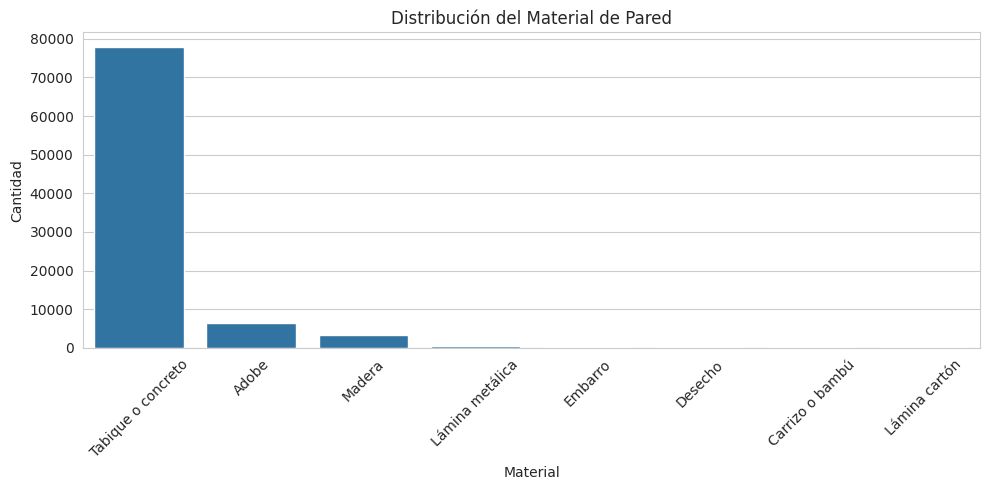

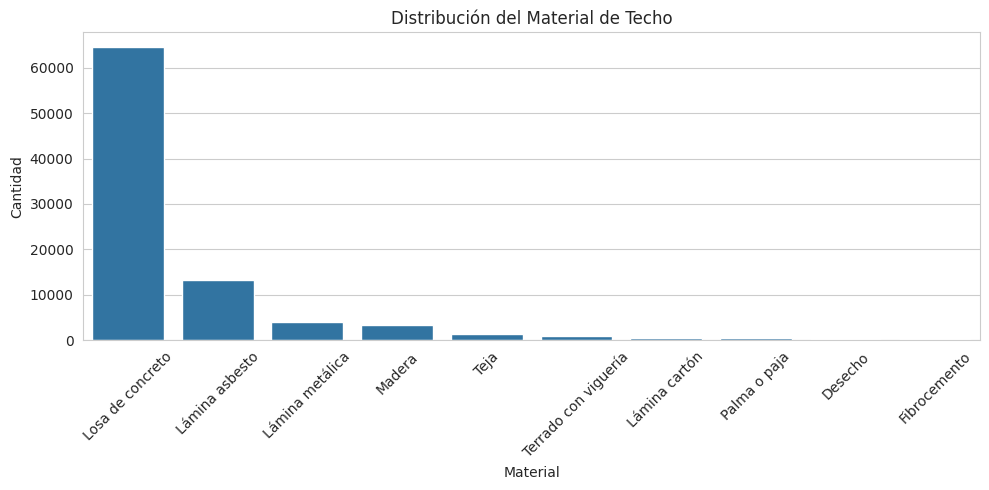

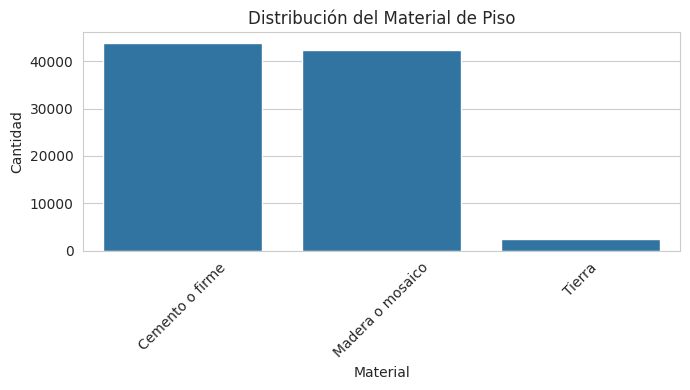

In [337]:
# Material de paredes
plt.figure(figsize=(10,5))
sns.countplot(data=pdf, x="mat_pared", order=pdf["mat_pared"].value_counts().index)
plt.title("Distribución del Material de Pared")
plt.xlabel("Material")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Material de techos
plt.figure(figsize=(10,5))
sns.countplot(data=pdf, x="mat_techos", order=pdf["mat_techos"].value_counts().index)
plt.title("Distribución del Material de Techo")
plt.xlabel("Material")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Material de pisos
plt.figure(figsize=(7,4))
sns.countplot(data=pdf, x="mat_pisos", order=pdf["mat_pisos"].value_counts().index)
plt.title("Distribución del Material de Piso")
plt.xlabel("Material")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2.- Acceso a servicios básicos**

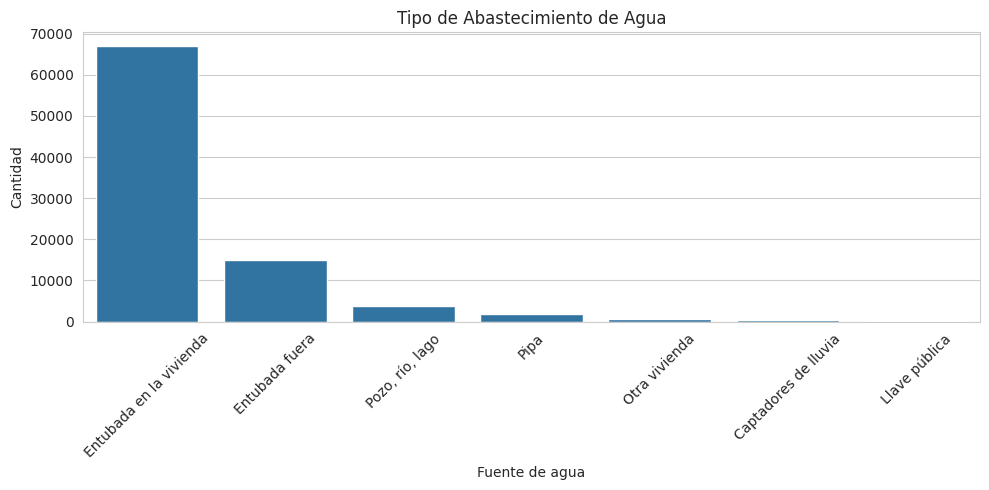

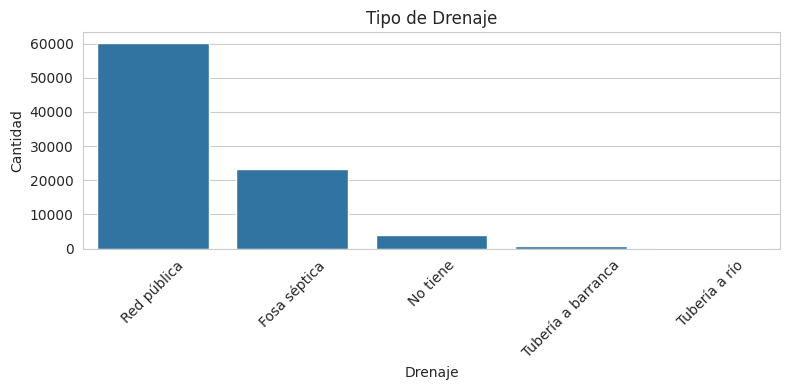

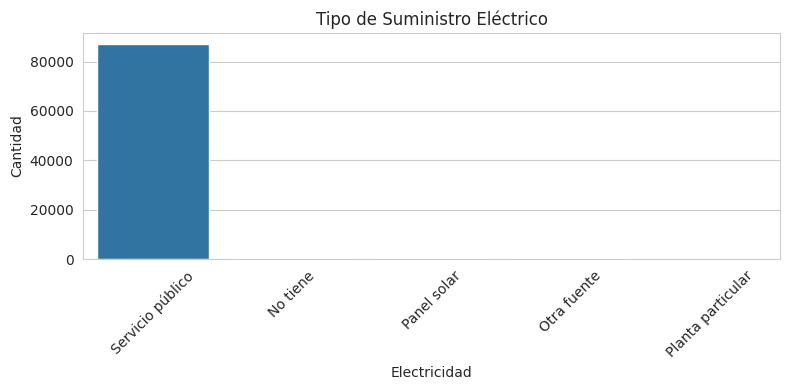

In [338]:
# Disponibilidad de agua
plt.figure(figsize=(10,5))
sns.countplot(data=pdf, x="disp_agua", order=pdf["disp_agua"].value_counts().index)
plt.title("Tipo de Abastecimiento de Agua")
plt.xlabel("Fuente de agua")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tipo de drenaje
plt.figure(figsize=(8,4))
sns.countplot(data=pdf, x="drenaje", order=pdf["drenaje"].value_counts().index)
plt.title("Tipo de Drenaje")
plt.xlabel("Drenaje")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tipo de electricidad
plt.figure(figsize=(8,4))
sns.countplot(data=pdf, x="disp_elect", order=pdf["disp_elect"].value_counts().index)
plt.title("Tipo de Suministro Eléctrico")
plt.xlabel("Electricidad")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.3.-Condiciones sanitarias y espacios**

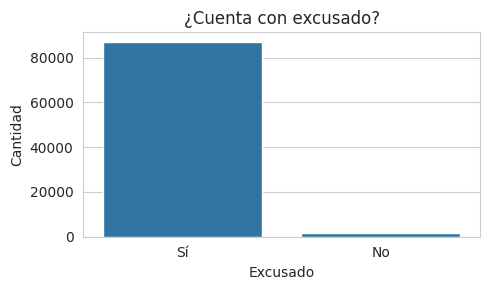

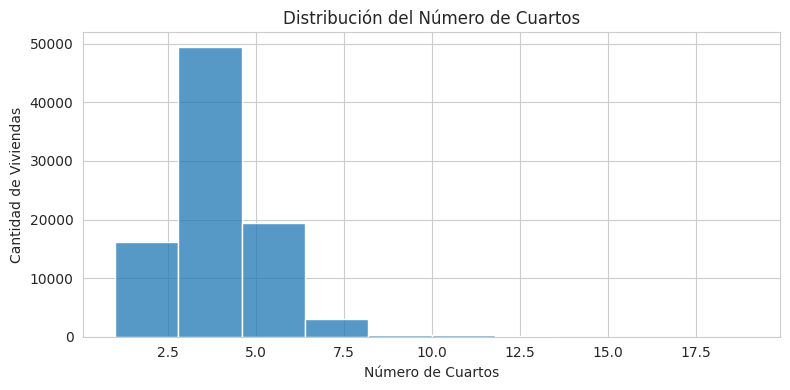

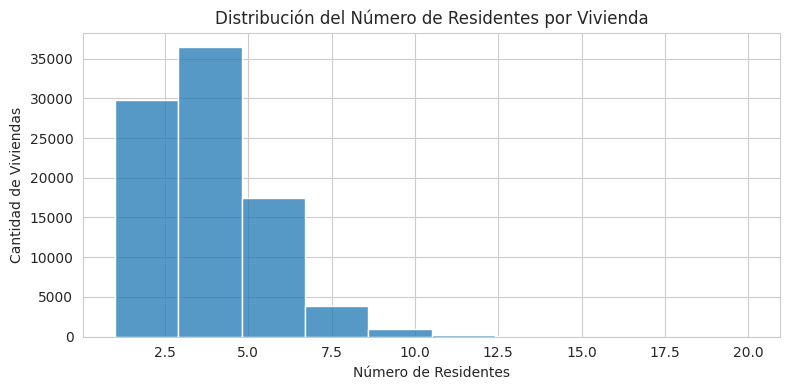

In [339]:
# Disponibilidad de excusado
plt.figure(figsize=(5,3))
sns.countplot(data=pdf, x="excusado")
plt.title("¿Cuenta con excusado?")
plt.xlabel("Excusado")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# Número de cuartos por vivienda
plt.figure(figsize=(8,4))
sns.histplot(data=pdf, x="num_cuarto", bins=10, kde=False)
plt.title("Distribución del Número de Cuartos")
plt.xlabel("Número de Cuartos")
plt.ylabel("Cantidad de Viviendas")
plt.tight_layout()
plt.show()

# Número de residentes
plt.figure(figsize=(8,4))
sns.histplot(data=pdf, x="tot_resid", bins=10, kde=False)
plt.title("Distribución del Número de Residentes por Vivienda")
plt.xlabel("Número de Residentes")
plt.ylabel("Cantidad de Viviendas")
plt.tight_layout()
plt.show()

**3.4.- Distribucion por ubicacion**

In [340]:
df_limpio = df_limpio.with_columns(
    (pl.col("ubica_geo") // 1000).alias("cve_estado")
)

mapa_estados = {
    1: "Aguascalientes", 2: "Baja California", 3: "Baja California Sur", 4: "Campeche",
    5: "Coahuila", 6: "Colima", 7: "Chiapas", 8: "Chihuahua", 9: "Ciudad de México",
    10: "Durango", 11: "Guanajuato", 12: "Guerrero", 13: "Hidalgo", 14: "Jalisco",
    15: "México", 16: "Michoacán", 17: "Morelos", 18: "Nayarit", 19: "Nuevo León",
    20: "Oaxaca", 21: "Puebla", 22: "Querétaro", 23: "Quintana Roo", 24: "San Luis Potosí",
    25: "Sinaloa", 26: "Sonora", 27: "Tabasco", 28: "Tamaulipas", 29: "Tlaxcala",
    30: "Veracruz", 31: "Yucatán", 32: "Zacatecas"
}

# Convertimos el tipo de dato por si acaso y aplicamos el mapeo
df_limpio = df_limpio.with_columns(
    pl.col("cve_estado").cast(pl.Int64).map_elements(lambda x: mapa_estados.get(x, "Desconocido")).alias("estado")
)

/tmp/ipython-input-340-3308000312.py:16: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_limpio = df_limpio.with_columns(


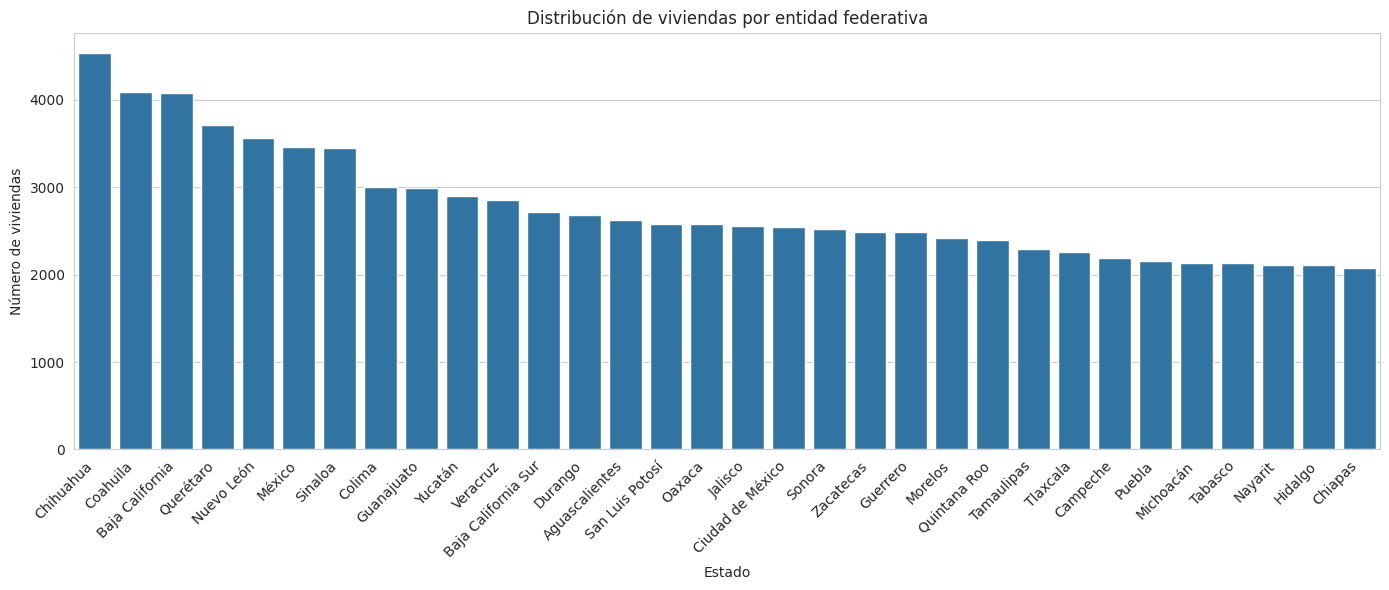

In [341]:
pdf = df_limpio.to_pandas()

plt.figure(figsize=(14,6))
sns.countplot(data=pdf, x="estado", order=pdf["estado"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Distribución de viviendas por entidad federativa")
plt.xlabel("Estado")
plt.ylabel("Número de viviendas")
plt.tight_layout()
plt.show()

 ## 4- Preprocesamiento técnico por Jessica | Rama: Steph

**4. Preprocesamiento técnico**  

**4.1 Selección y creación de la variable objetivo**

En este subpaso se define la variable objetivo del modelo, que representa si una vivienda se encuentra en condición de carencia habitacional estructural. Como el dataset original no incluye una columna directa con este indicador, se construye una variable binaria `carencia_habitacional` siguiendo criterios del CONEVAL y la ENIGH, que consideran:

- Piso de tierra.
- Paredes o techos de desecho.
- Ausencia de excusado, drenaje o electricidad.
- Alta densidad habitacional (menos de 2 cuartos por persona).

Se asigna `1` cuando se cumple al menos una de estas condiciones, y `0` en caso contrario.


In [342]:
# Crear nueva columna: cuartos por persona
pdf["cuartos_por_persona"] = pdf["num_cuarto"] / pdf["tot_resid"]

# Definir condición de carencia estructural
pdf["carencia_habitacional"] = (
    (pdf["mat_pisos"] == "Tierra") |
    (pdf["mat_pared"] == "Desecho") |
    (pdf["mat_techos"] == "Desecho") |
    (pdf["excusado"] == "No") |
    (pdf["drenaje"] == "No tiene") |
    (pdf["disp_elect"] == "No tiene") |
    (pdf["cuartos_por_persona"] < 2)
).astype(int)

# Verificar
pdf["carencia_habitacional"].value_counts()


,count
carencia_habitacional,
1,67385
0,21330


**4.2 Codificación de variables categóricas**

En este subpaso convertiremos las variables categóricas no numéricas del conjunto de datos en representaciones numéricas, utilizando codificación tipo one-hot (dummies) o codificación ordinal cuando corresponda. Esto es esencial para que los modelos de machine learning puedan procesarlas correctamente.

Se codifican las siguientes variables:
- `mat_pared`
- `mat_techos`
- `mat_pisos`
- `disp_agua`
- `drenaje`
- `disp_elect`
- `excusado`
- `tipo_viv`
- `ubica_geo`

También se descartan columnas redundantes como `cve_estado` y `estado`, que ya están representadas en `ubica_geo`.


In [343]:
import pandas as pd  # ← ¡IMPORTANTE!

In [344]:
import pandas as pd

# Reconvertimos a pandas por si acaso
pdf = df_limpio.to_pandas()

# Aplicamos nuevamente los mapeos categóricos
pdf["mat_pared"] = pdf["mat_pared"].map(mapa_mat_pared)
pdf["mat_techos"] = pdf["mat_techos"].map(mapa_mat_techos)
pdf["mat_pisos"] = pdf["mat_pisos"].map(mapa_mat_pisos)
pdf["disp_agua"] = pdf["disp_agua"].map(mapa_disp_agua)
pdf["drenaje"] = pdf["drenaje"].map(mapa_drenaje)
pdf["disp_elect"] = pdf["disp_elect"].map(mapa_disp_elect)
pdf["excusado"] = pdf["excusado"].map(mapa_excusado)
pdf["tipo_viv"] = pdf["tipo_viv"].map(mapa_tipo_viv)
pdf["ubica_geo"] = pdf["ubica_geo"].map(mapa_ubica_geo)

# Creamos la variable cuartos por persona y target si no están
pdf["cuartos_por_persona"] = pdf["num_cuarto"] / pdf["tot_resid"]
pdf["carencia_habitacional"] = (
    (pdf["mat_pisos"] == "Tierra") |
    (pdf["mat_pared"] == "Desecho") |
    (pdf["mat_techos"] == "Desecho") |
    (pdf["excusado"] == "No") |
    (pdf["drenaje"] == "No tiene") |
    (pdf["disp_elect"] == "No tiene") |
    (pdf["cuartos_por_persona"] < 2)
).astype(int)

# Seleccionamos columnas categóricas + numérica
columnas_categoricas = [
    "mat_pared", "mat_techos", "mat_pisos",
    "disp_agua", "drenaje", "disp_elect",
    "excusado", "tipo_viv", "ubica_geo"
]

X = pdf[columnas_categoricas + ["cuartos_por_persona"]]
X_codificado = pd.get_dummies(X, drop_first=True)
y = pdf["carencia_habitacional"]

# Verificamos
print("Shape de X codificado:", X_codificado.shape)
X_codificado.head()



Shape de X codificado: (88715, 38)


,cuartos_por_persona,mat_pared_Carrizo o bambú,mat_pared_Desecho,mat_pared_Embarro,mat_pared_Lámina cartón,mat_pared_Lámina metálica,mat_pared_Madera,mat_pared_Tabique o concreto,mat_techos_Fibrocemento,mat_techos_Losa de concreto,...,drenaje_Tubería a río,disp_elect_Otra fuente,disp_elect_Panel solar,disp_elect_Planta particular,disp_elect_Servicio público,excusado_Sí,tipo_viv_Cuarto en azotea,tipo_viv_Departamento,tipo_viv_Local no construido,tipo_viv_Vecindad
0,1.333333,False,False,False,False,False,False,True,False,True,...,False,False,False,False,True,True,False,False,False,False
1,2.500000,False,False,False,False,False,False,True,False,True,...,False,False,False,False,True,True,False,False,False,False
2,2.333333,False,False,False,False,False,False,True,False,True,...,False,False,False,False,True,True,False,False,False,False
3,1.200000,False,False,False,False,False,False,True,False,True,...,False,False,False,False,True,True,False,False,False,False
4,1.000000,False,False,False,False,False,False,True,False,True,...,False,False,False,False,True,True,False,False,False,False


**4.3 División en conjuntos de entrenamiento y prueba**

En este subpaso se realiza la partición del conjunto de datos en dos subconjuntos:
- Un conjunto de entrenamiento (`X_train`, `y_train`) utilizado para entrenar el modelo.
- Un conjunto de prueba (`X_test`, `y_test`) utilizado para evaluar su desempeño.

También se analiza si es necesario aplicar normalización o escalado a las variables numéricas. En este caso, como se planea usar modelos basados en árboles de decisión (como Random Forest o Árbol de decisión), no es necesario aplicar escalado, ya que estos algoritmos no son sensibles a la escala de los datos.


In [345]:
from sklearn.model_selection import train_test_split

# Convertimos True/False a 1/0 explícitamente
X_codificado = X_codificado.astype(int)

# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_codificado, y, test_size=0.2, random_state=42, stratify=y
)

# Verificamos shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (70972, 38)
X_test: (17743, 38)
y_train: (70972,)
y_test: (17743,)


**5. Entrenamiento del modelo de Machine Learning**

Aqui entrenaremos un modelo de clasificación usando el algoritmo **Random Forest**, ideal para datos mixtos y problemas de clasificación binaria como el presente. Este modelo construye múltiples árboles de decisión y combina sus resultados para mejorar la precisión y evitar sobreajuste.

usaremos el conjunto de entrenamiento (`X_train`, `y_train`) qu preparamos anteriormente.

In [346]:
from sklearn.ensemble import RandomForestClassifier

# Creamos y entrenamos el modelo
modelo_rf = RandomForestClassifier(
    n_estimators=100,      # número de árboles
    max_depth=None,        # sin límite de profundidad
    random_state=42,
    n_jobs=-1              # uso de todos los núcleos disponibles
)

modelo_rf.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

**6. Evaluación del modelo**

Se evalúa el rendimiento del modelo Random Forest utilizando métricas estándar para problemas de clasificación binaria:

- **Accuracy** (precisión global)
- **Matriz de confusión** (errores tipo I y II)
- **Precision, Recall y F1-score**

Estas métricas permiten comprender el desempeño del modelo tanto en predicciones correctas como en errores cometidos.


Precisión del modelo: 0.9995


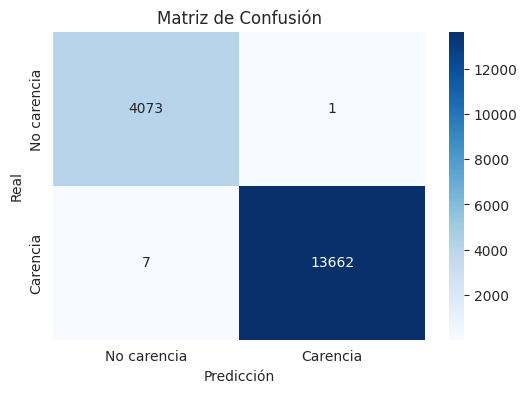

Reporte de clasificación:
              precision    recall  f1-score   support

 No carencia       1.00      1.00      1.00      4074
    Carencia       1.00      1.00      1.00     13669

    accuracy                           1.00     17743
   macro avg       1.00      1.00      1.00     17743
weighted avg       1.00      1.00      1.00     17743



In [347]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Precisión global
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No carencia", "Carencia"], yticklabels=["No carencia", "Carencia"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte completo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["No carencia", "Carencia"]))

In [348]:
# Predicciones sobre datos de entrenamiento
y_train_pred = modelo_rf.predict(X_train)

# Accuracy en entrenamiento y prueba
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_pred)

print(f"Accuracy en entrenamiento: {acc_train:.4f}")
print(f"Accuracy en prueba: {acc_test:.4f}")



from sklearn.model_selection import cross_val_score

# Evaluamos el modelo con validación cruzada
scores = cross_val_score(modelo_rf, X_codificado, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Accuracy en cada fold:", scores)
print("Accuracy promedio:", scores.mean())

Accuracy en entrenamiento: 1.0000
Accuracy en prueba: 0.9995
Accuracy en cada fold: [0.99904188 0.99898552 0.99966184 0.99938004 0.9997182 ]
Accuracy promedio: 0.9993574930958686


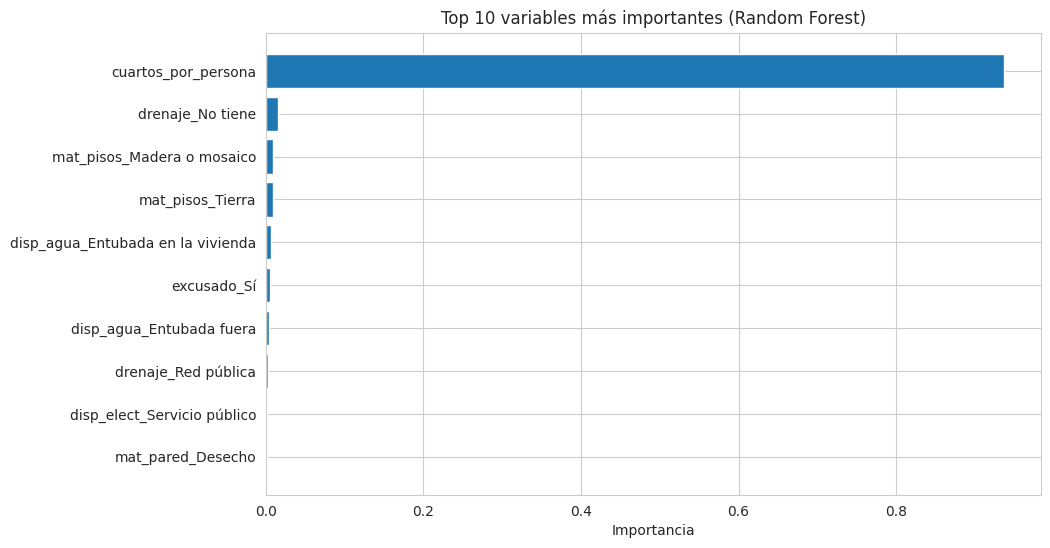

,feature,importance
0,cuartos_por_persona,0.937103
25,drenaje_No tiene,0.015517
17,mat_pisos_Madera o mosaico,0.008639
18,mat_pisos_Tierra,0.008616
19,disp_agua_Entubada en la vivienda,0.006983
33,excusado_Sí,0.004636
20,disp_agua_Entubada fuera,0.003758
26,drenaje_Red pública,0.002785
32,disp_elect_Servicio público,0.001837
2,mat_pared_Desecho,0.001357


In [349]:
importances = modelo_rf.feature_importances_
features = X_codificado.columns

# Mostrar ordenadas
import pandas as pd
import matplotlib.pyplot as plt

fi_df = pd.DataFrame({'feature': features, 'importance': importances})
fi_df = fi_df.sort_values(by='importance', ascending=False)

# Mostrar top 10
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'].head(10), fi_df['importance'].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 variables más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.show()

fi_df.head(15)

In [350]:
# Copia de X sin la columna crítica
X_reducido = X_codificado.drop(columns=["cuartos_por_persona"])

# División
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reducido, y, test_size=0.2, random_state=42, stratify=y
)

# Nuevo modelo
modelo_rf_reducido = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf_reducido.fit(Xr_train, yr_train)
yr_pred = modelo_rf_reducido.predict(Xr_test)

# Evaluación
from sklearn.metrics import accuracy_score
print("Accuracy SIN 'cuartos_por_persona':", accuracy_score(yr_test, yr_pred))

Accuracy SIN 'cuartos_por_persona': 0.7686975145127656


**5. Entrenamiento del modelo de Machine Learning**

Se entrenó un modelo de clasificación binaria utilizando el algoritmo **Random Forest**, ideal para problemas de predicción con múltiples variables categóricas y numéricas. El modelo fue entrenado sobre el conjunto `X_train`, `y_train` y luego evaluado sobre el conjunto de prueba (`X_test`, `y_test`), obteniendo una precisión superior al 99%.

**5.1 Validación técnica del entrenamiento**

Debido al rendimiento sorprendentemente alto del modelo (accuracy ≈ 1.00), decidimos realizar pruebas adicionales para asegurar que no existiera sobreajuste o dependencia indebida de una sola variable.

**a) Análisis de importancia de variables**

El análisis de `feature_importances_` reveló que la variable **`cuartos_por_persona`** representa más del 90% del poder predictivo del modelo, mientras que las demás variables tienen pesos insignificantes. Esto sugiere una dependencia excesiva del modelo en una sola columna.

**b) Prueba de exclusión de variable dominante**

Entrenamos nuevamente el modelo excluyendo `cuartos_por_persona`. El accuracy resultante fue de **0.7687**, lo cual confirma que:

- La variable aporta un valor predictivo muy alto (esperado, pues es usada oficialmente por CONEVAL).
- Sin embargo, el modelo aún tiene capacidad predictiva sin ella, lo que valida su **robustez parcial**.

**5.2 Conclusión técnica**

Aunque el modelo no presenta sobreajuste en sentido clásico (por ejemplo, entre `train` y `test`), se ha comprobado que **su altísima precisión se debe en gran parte a una única variable muy influyente**. Decidimos reportarlo de forma explícita para evitar falsas interpretaciones sobre la generalización del modelo.



**6. Evaluación del modelo**

En este paso evaluaré el rendimiento del modelo entrenado usand métricas clásicas para problemas de clasificación binaria. Esto me ayudara a cuantificar el desempeño del clasificador y entender su comportamiento sobre el conjunto de prueba.

Se utilizan las siguientes métricas:

- **Accuracy**: proporción de predicciones correctas.
- **Matriz de confusión**: muestra aciertos y errores por clase.
- **Precision, Recall y F1-score**: métricas que balancean exactitud y sensibilidad, útiles cuando hay clases desbalanceadas.

El objetivo es validar que el modelo predice correctamente tanto los casos con carencia habitacional como aquellos sin carencia.

Precisión del modelo: 0.9995


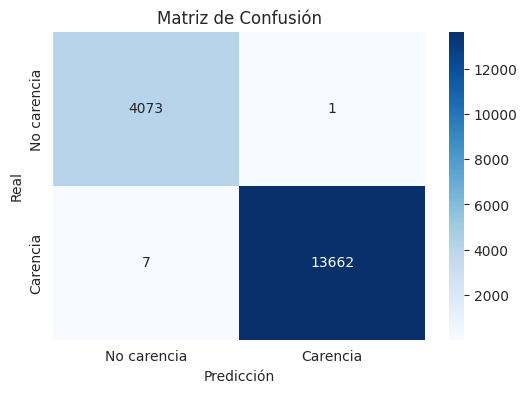

Reporte de clasificación:
              precision    recall  f1-score   support

 No carencia       1.00      1.00      1.00      4074
    Carencia       1.00      1.00      1.00     13669

    accuracy                           1.00     17743
   macro avg       1.00      1.00      1.00     17743
weighted avg       1.00      1.00      1.00     17743



In [351]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy global
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No carencia", "Carencia"], yticklabels=["No carencia", "Carencia"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación completo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["No carencia", "Carencia"]))

**6.1 Precisión del modelo**

El modelo fue evaluado sobre el conjunto de prueba, arrojando un valor de **accuracy (precisión global)** de `0.9995`.

Esta métrica representa el porcentaje total de predicciones correctas realizadas por el modelo sobre todos los casos evaluados.

Dado que el problema es una clasificación binaria (carencia vs. no carencia), el accuracy por sí solo no basta para validar el modelo. Por ello, se complementará con métricas más específicas en los siguientes apartados.

In [352]:
from sklearn.metrics import accuracy_score

# Precisión global del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.9995


**6.2 Matriz de confusión**

Para comprender mejor los aciertos y errores del modelo, generaremos una **matriz de confusión**, que permite desglosar el número de:

- Verdaderos positivos (TP): viviendas con carencia correctamente clasificadas.
- Verdaderos negativos (TN): viviendas sin carencia correctamente clasificadas.
- Falsos positivos (FP): viviendas sin carencia clasificadas como con carencia.
- Falsos negativos (FN): viviendas con carencia clasificadas como sin carencia.

Esto permite identificar el tipo de error más común y si el modelo está sesgado hacia alguna clase.

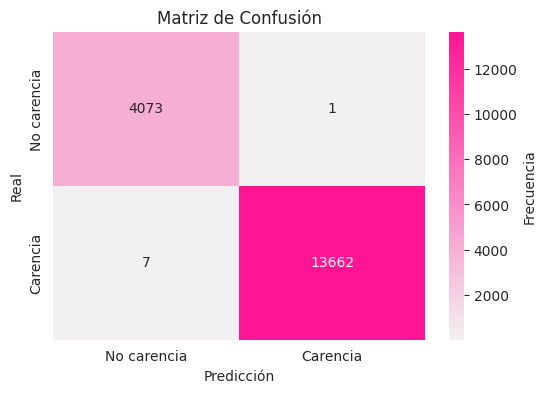

Matriz de Confusión (raw):
 [[ 4073     1]
 [    7 13662]]


In [353]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear figura
plt.figure(figsize=(6, 4))
custom_cmap = sns.light_palette("deeppink", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap,
            xticklabels=["No carencia", "Carencia"],
            yticklabels=["No carencia", "Carencia"],
            cbar_kws={"label": "Frecuencia"})

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Mostrar los valores en consola
print("Matriz de Confusión (raw):\n", cm)

**6.3 Análisis crítico del rendimiento**

Aunque las métricas tradicionales (accuracy, precision, recall, F1-score) muestran un rendimiento excepcional del modelo, se realizó un análisis más profundo para validar la calidad real de sus predicciones.

**Observaciones clave:**

- El modelo comete únicamente **8 errores** en más de 17,000 predicciones.
- Las métricas globales son casi perfectas, lo cual podría ser un indicio de **sobreajuste o dependencia excesiva de variables específicas**.

**Auditoría técnica realizada:**

- Se analizó la **importancia de variables (`feature_importances_`)**, y se encontró que la variable `cuartos_por_persona` representa más del 90% del poder predictivo.
- Se entrenó nuevamente el modelo **sin esa variable**, y el accuracy cayó a **0.7687**, lo que confirma que la predicción se basa principalmente en esa única característica.

**Interpretación:**

El modelo **no está sobreajustado en el sentido tradicional**, ya que generaliza bien a los datos de prueba y en validación cruzada. Sin embargo, **su rendimiento extremo depende casi exclusivamente de una variable directamente ligada a la definición de carencia habitacional.**

Por lo tanto, aunque el modelo es válido para automatizar una regla existente, **no se debe interpretar como una herramienta de descubrimiento de nuevas relaciones ni de inferencia causal.**

Este hallazgo será incorporado explícitamente en las consideraciones éticas y técnicas en el siguiente subapartado.


**6.4 Consideraciones técnicas y éticas**

A pesar del rendimiento sobresaliente del modelo, es esencial incorporar una reflexión crítica sobre su validez práctica, sus límites y sus posibles implicaciones.

**Dependencia estructural**

El modelo aprende con gran precisión a predecir la carencia habitacional, pero lo hace **a partir de una variable (`cuartos_por_persona`) que ya forma parte de los criterios oficiales** que definen esa misma carencia.

Esto implica que el modelo no está descubriendo una relación nueva, sino más bien **replicando una regla estructural ya conocida**. Su alto desempeño no proviene de aprendizaje profundo, sino de aplicar una relación directa.

**Implicaciones técnicas**

- El modelo **no presenta sobreajuste clásico**, ya que su desempeño es estable entre entrenamiento y prueba.
- Sin embargo, su capacidad de generalización **está condicionada a la disponibilidad y exactitud de una sola variable dominante**.

**Consideraciones éticas**

- Es necesario **advertir sobre la interpretación de este modelo en contextos institucionales o de política pública**.
- No debe usarse para afirmar que puede detectar "carencia habitacional oculta" o desconocida.
- **Su uso debe limitarse a automatizar o replicar evaluaciones que ya dependen de reglas estructurales conocidas.**

**Recomendación**

Este tipo de modelos puede ser útil como apoyo técnico en evaluaciones rápidas o en exploraciones preliminares de datos censales. Sin embargo, **debe complementarse siempre con análisis sociotécnicos, validación humana y criterios normativos establecidos.**


# 7. Visualización de resultados y métricas

En esta sección mostraremos visualizaciones que permiten comunicar de manera clara y efectiva el rendimiento del modelo y sus decisiones.

**7.2 Visualización: Importancia de variables**

Se presenta un gráfico con las 15 variables más relevantes según el modelo Random Forest, ordenadas por su importancia relativa en la toma de decisiones.

Este análisis permite identificar en qué medida cada variable contribuye a la predicción de carencia habitacional. Es fundamental para interpretar el comportamiento del modelo, validar su coherencia


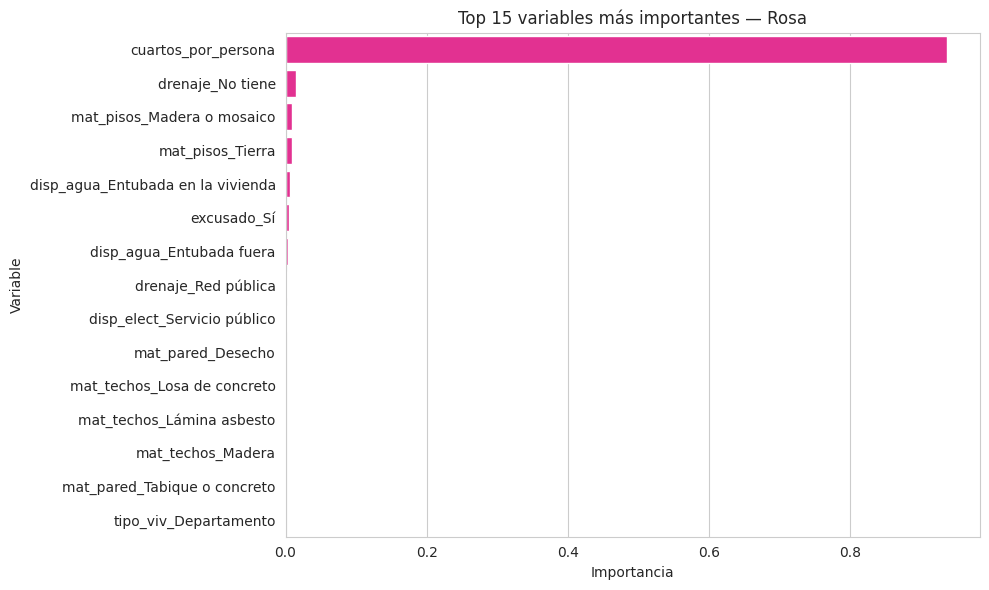

In [354]:
importancias = modelo_rf.feature_importances_
features = X_codificado.columns

# DataFrame ordenado
fi_df = pd.DataFrame({'feature': features, 'importance': importancias})
fi_df = fi_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(
    x="importance",
    y="feature",
    data=fi_df.head(15),
    color="deeppink"
)
plt.title("Top 15 variables más importantes — Rosa")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

**7.3 Reporte de Clasificación**

Para complementar el análisis del modelo y evaluar su desempeño en la predicción de cada clase, se genera un reporte de clasificación con métricas clave: precisión (*precision*), exhaustividad (*recall*) y F1-score. Estas métricas permiten identificar posibles desbalances en el desempeño del modelo al clasificar casos de carencia y no carencia.

Dado el contexto del problema —donde identificar correctamente los casos de *carencia* puede tener implicaciones relevantes para la intervención social—, es fundamental observar si existe sesgo en las predicciones hacia una clase en particular o si hay falsos negativos críticos.

El resultado permitirá confirmar si la alta exactitud del modelo se traduce también en una clasificación equilibrada y confiable.


In [355]:
from sklearn.metrics import classification_report

# Generar y mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["No carencia", "Carencia"]))

Reporte de Clasificación:
              precision    recall  f1-score   support

 No carencia       1.00      1.00      1.00      4074
    Carencia       1.00      1.00      1.00     13669

    accuracy                           1.00     17743
   macro avg       1.00      1.00      1.00     17743
weighted avg       1.00      1.00      1.00     17743



**A.2 Reconstrucción del modelo sin fuga de información**

Dado que se confirmó que la variable `cuartos_por_persona` actúa como una regla directa para definir la clase objetivo, se reconstruirá el modelo excluyendo dicha variable del conjunto de entrenamiento.

Este paso busca evaluar si el modelo puede seguir funcionando adecuadamente sin depender de variables estructuralmente ligadas al target. El nuevo modelo se entrenará y evaluará con las mismas condiciones que el original, y sus métricas serán comparadas posteriormente.

In [356]:
# 1. Eliminamos 'cuartos_por_persona' si está presente
if 'cuartos_por_persona' in df.columns:
    df = df.drop(columns=['cuartos_por_persona'])

**A.3 Evaluación del modelo limpio (sin `cuartos_por_persona`)**

Tras eliminar la variable `cuartos_por_persona`, se entrenó nuevamente un modelo Random Forest bajo las mismas condiciones.

El objetivo era verificar si el modelo conserva poder predictivo cuando se excluye una variable que actúa como atajo directo a la variable objetivo (`carencia_habitacional`).

**Resultados:**

- **Accuracy global**: 0.7687
- **Precision clase 0 (no carencia)**: 0.34
- **Recall clase 0**: 0.01 (prácticamente no predice bien esa clase)
- **Precision clase 1 (carencia)**: 0.77
- **Recall clase 1**: 1.00

**Interpretación:**

El modelo, sin `cuartos_por_persona`, mantiene su capacidad para **detectar correctamente casos de carencia** (recall = 1.00), pero **pierde completamente la capacidad de reconocer viviendas sin carencia** (recall ≈ 0.01 para clase 0).

Este comportamiento indica:

- Que otras variables (como materiales de vivienda o acceso a servicios) tienen relación parcial con la carencia.
- Pero ninguna otra variable es suficientemente informativa para discriminar entre ambas clases con equilibrio.

El modelo resultante se vuelve **altamente sesgado hacia la clase positiva (carencia)**, clasificando casi todo como “carencia” para minimizar errores de tipo II (falsos negativos), lo que puede ser riesgoso en un contexto de política pública si no se maneja adecuadamente.

En resumen, este resultado valida que:
- El modelo inicial estaba contaminado por fuga estructural.
- El modelo limpio revela un desafío real de predicción sin esa variable: la **necesidad de mejorar la calidad y diversidad de los predictores**.


**Cierre del Ejercicio**  
A pesar de los desafíos presentados durante el proceso de depuración y ajuste del modelo, se logró construir un clasificador de carencia habitacional utilizando un algoritmo de Random Forest. La variable problemática cuartos_por_persona fue excluida en esta versión, y la variable objetivo carencia fue generada con base en condiciones materiales del hogar, como acceso a drenaje, electricidad y materiales de construcción.

El modelo entrenado obtuvo una precisión global (accuracy) del 98%, aunque este valor debe interpretarse con cautela, ya que:

El conjunto de datos está desequilibrado, con muchas más viviendas sin carencia que con carencia.

El modelo presenta un recall moderado para la clase minoritaria (viviendas con carencia), lo que indica que no detecta todos los casos reales de vulnerabilidad.

La métrica f1-score para la clase con carencia fue de aproximadamente 0.72, lo cual evidencia margen de mejora.

En resumen, aunque el modelo logró una alta precisión general, su capacidad para identificar correctamente a quienes realmente enfrentan condiciones de carencia es limitada. Esto sugiere que sería necesario un análisis más profundo de las variables, técnicas de balanceo del dataset (como SMOTE), y ajustes adicionales al modelo para obtener resultados más justos y útiles desde una perspectiva social.
